# Initial exploration 02.06.2017

In [1]:
%matplotlib inline

import json
import pandas as pd
import seaborn as sns
from haversine import haversine

Read data for 02.06.2017.

In [2]:
with open('../data/renovation_votes_020617.csv') as file:    
    data = json.load(file)

Layout of raw data.

In [3]:
data[:2]

[{'card_fields': {'area_name': 'Можайский',
   'district_name': 'ЗАО',
   'name': 'улица Кубинка, дом 12, корпус 3',
   'result': {'protiv': 24.0, 'unom_type': 1, 'yavka': 41.0, 'za': 76.0},
   'status': 'in_list',
   'updated_at': '02.06'},
  'center': {'coordinates': [55.7202830854525, 37.4102523180915],
   'type': 'Point'},
  'polygon': {'coordinates': [[[55.7205874341856, 37.4101799726486],
     [55.7205813913916, 37.4103677272797],
     [55.7199801287133, 37.4103248119354],
     [55.7199831501569, 37.4101370573044],
     [55.7205874341856, 37.4101799726486]]],
   'type': 'Polygon'},
  'unom': '12107'},
 {'card_fields': {'area_name': 'Можайский',
   'district_name': 'ЗАО',
   'name': 'улица Кубинка, дом 18, корпус 5',
   'result': {'protiv': 19.0, 'unom_type': 1, 'yavka': 33.0, 'za': 81.0},
   'status': 'in_list',
   'updated_at': '02.06'},
  'center': {'coordinates': [55.72235386989, 37.4107619153359],
   'type': 'Point'},
  'polygon': {'coordinates': [[[55.7226419299467, 37.41053

Convert data to DataFrame.

In [4]:
l = []
for building in data:
    card_fields = building['card_fields']
    l.append({'area_name': card_fields['area_name'],
              'district_name': card_fields['district_name'],
              'name': card_fields['name'],
              'vote_against': card_fields['result']['protiv'],
              'vote_for': card_fields['result']['za'],
              'vote_attendance': card_fields['result']['yavka'],
              'updated_at': card_fields['updated_at'],
              'center_lat': building['center']['coordinates'][0],
              'center_lon': building['center']['coordinates'][1]})
    
df = pd.DataFrame(l)
df.head()

,area_name,center_lat,center_lon,district_name,name,updated_at,vote_against,vote_attendance,vote_for
0,Можайский,55.720283,37.410252,ЗАО,"улица Кубинка, дом 12, корпус 3",02.06,24.0,41.0,76.0
1,Можайский,55.722354,37.410762,ЗАО,"улица Кубинка, дом 18, корпус 5",02.06,19.0,33.0,81.0
2,Западное Дегунино,55.870746,37.511166,САО,"Ангарская улица, дом 2, корпус 1",02.06,2.0,47.0,98.0
3,Западное Дегунино,55.876925,37.516742,САО,"Ангарская улица, дом 21",02.06,0.0,39.0,100.0
4,Можайский,55.723547,37.405860,ЗАО,"улица Кубинка, дом 13",02.06,4.0,60.0,96.0


Number of unique values per column. How much distinct areas, districts etc.

In [5]:
df.nunique()

area_name            91
center_lat         4546
center_lon         4546
district_name        11
name               4546
updated_at            1
vote_against         85
vote_attendance      88
vote_for             86
dtype: int64

Various statistics for numeric columns.

In [6]:
df.describe()

,center_lat,center_lon,vote_against,vote_attendance,vote_for
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,55.753448,37.627734,12.534316,49.338099,87.223713
std,0.084797,0.141260,14.345901,11.580524,14.962671
min,55.385341,37.163595,0.000000,0.000000,0.000000
25%,55.686421,37.519864,3.000000,42.000000,83.000000
50%,55.750816,37.647664,8.000000,49.000000,92.000000
75%,55.816957,37.756762,16.000000,55.000000,97.000000
max,55.987630,37.877697,91.000000,100.000000,100.000000


Plot distribution of vote for percentage.

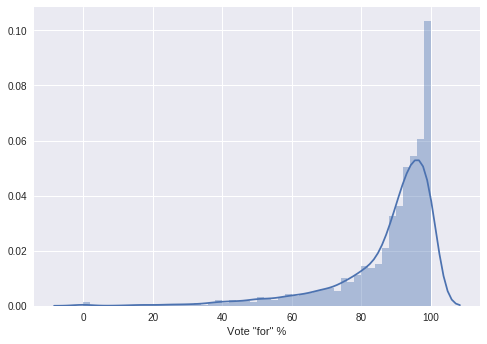

In [7]:
sns.distplot(df.vote_for, axlabel='Vote "for" %')

There are a lot of 100% results. Let's check how much actually.

In [8]:
len(df[df.vote_for == 100])

641

Plot vote attendance percent only for buildings where people are 100% for renovation.

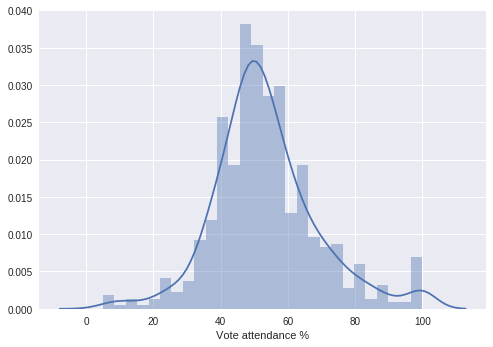

In [9]:
sns.distplot(df[df.vote_for == 100].vote_attendance, axlabel='Vote attendance %')

Plot shows that there are 100% "for" results even when all people from building have voted. Let's print them.

In [10]:
df[(df.vote_for == 100) & (df.vote_attendance == 100)]

,area_name,center_lat,center_lon,district_name,name,updated_at,vote_against,vote_attendance,vote_for
814,Басманный,55.767070,37.672735,ЦАО,"Доброслободская улица, дом 10, строение 5",02.06,0.0,100.0,100.0
891,Донской,55.693013,37.622316,ЮАО,"Варшавское шоссе, дом 31",02.06,0.0,100.0,100.0
910,Чертаново Южное,55.585740,37.608181,ЮАО,"улица Газопровод, дом 6Г, корпус 3",02.06,0.0,100.0,100.0
1181,Можайский,55.711478,37.416842,ЗАО,"2-й Дорогобужский переулок, дом 6",02.06,0.0,100.0,100.0
1539,Можайский,55.711210,37.417172,ЗАО,"2-й Дорогобужский переулок, дом 9",02.06,0.0,100.0,100.0
1541,Можайский,55.711354,37.442169,ЗАО,"Верейская улица, дом 19",02.06,0.0,100.0,100.0
1729,Ново-Переделкино,55.659678,37.352273,ЗАО,"7-я улица Лазенки, дом 4",02.06,0.0,100.0,100.0
3121,Ясенево,55.623019,37.537594,ЮЗАО,"Профсоюзная улица, дом 123А, строение 5",02.06,0.0,100.0,100.0
3622,Соколиная Гора,55.764427,37.738274,ВАО,"5-я улица Соколиной Горы, дом 21, корпус 1",02.06,0.0,100.0,100.0
3870,Митино,55.852785,37.390827,СЗАО,"Фабричная улица, дом 4, корпус 1",02.06,0.0,100.0,100.0


How much buildings in each district are potentially affected?

In [11]:
df.district_name.value_counts()

ВАО      1064
ЮВАО      671
ЗАО       534
СВАО      520
ЮЗАО      460
САО       423
ЮАО       360
СЗАО      338
ЦАО        75
ТиНАО      67
ЗелАО      34
Name: district_name, dtype: int64

How different are voting results between districts?

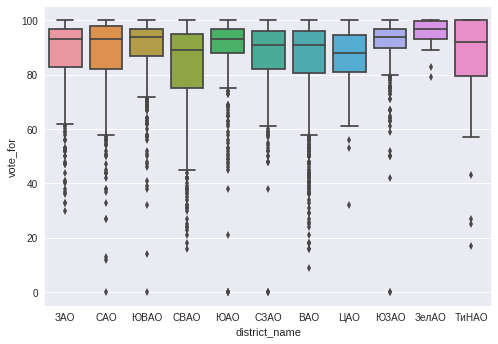

In [12]:
sns.boxplot(x='district_name', y='vote_for', data=df, orient='v')

Seems like results are pretty much the same between districts. What about areas? Let's print 5 areas that vote "for" mostly followed by 5 areas that mostly vote "against".

In [13]:
area_stats = df.groupby('area_name')[['vote_for', 'vote_attendance']].describe() \
    .sort_values([('vote_for', 'mean')], ascending=False)

pd.concat([area_stats.head(5), area_stats.tail(5)])

vote_for                                               \
                     count        mean        std    min     25%    50%   
area_name                                                                 
Ново-Переделкино      10.0  100.000000   0.000000  100.0  100.00  100.0   
Кокошкино              4.0  100.000000   0.000000  100.0  100.00  100.0   
Силино                 3.0   99.333333   1.154701   98.0   99.00  100.0   
Старое Крюково         3.0   99.000000   1.000000   98.0   98.50   99.0   
Бирюлёво Западное     13.0   98.307692   1.797434   95.0   97.00   98.0   
Марьина Роща          40.0   69.925000  19.627803   23.0   50.00   76.0   
Даниловский           28.0   67.500000  29.912836    0.0   57.25   77.0   
Ростокино             20.0   66.250000  25.461788   24.0   36.50   74.0   
Измайлово             49.0   65.204082  25.682338    9.0   48.00   70.0   
Ясенево                8.0   62.625000  41.562131    0.0   50.25   67.0   

                                 vote_attendance                              \
                      75%    max           count       mean        std   min   
area_name                                                                      
Ново-Переделкино   100.00  100.0            10.0  57.900000  20.365821  38.0   
Кокошкино          100.00  100.0             4.0  97.000000   6.000000  88.0   
Силино             100.00  100.0             3.0  79.000000   4.000000  75.0   
Старое Крюково      99.50  100.0             3.0  83.333333   2.081666  81.0   
Бирюлёво Западное  100.00  100.0            13.0  69.769231   6.672754  60.0   
Марьина Роща        83.75   97.0            40.0  47.200000  12.436918  18.0   
Даниловский         88.75  100.0            28.0  55.428571  24.425895   0.0   
Ростокино           89.00   98.0            20.0  58.000000  14.871378  31.0   
Измайлово           86.00  100.0            49.0  48.551020  13.280721  31.0   
Ясенево            100.00  100.0             8.0  33.625000  33.661922   0.0   

                                                
                     25%    50%     75%    max  
area_name                                       
Ново-Переделкино   50.00   50.0   59.75  100.0  
Кокошкино          97.00  100.0  100.00  100.0  
Силино             77.00   79.0   81.00   83.0  
Старое Крюково     82.50   84.0   84.50   85.0  
Бирюлёво Западное  65.00   69.0   74.00   83.0  
Марьина Роща       38.00   47.0   56.00   78.0  
Даниловский        48.00   54.0   70.25   95.0  
Ростокино          48.25   60.0   63.25   92.0  
Измайлово          40.00   46.0   53.00   93.0  
Ясенево             7.50   31.5   43.00  100.0

Now estimate distance to city center for each house. Assume that city center is Kremlin. Also print various statistics of this distance in kilometers.

In [14]:
kremlin_center = (55.7520, 37.6175)
df['dist_kremlin'] = df.apply(axis=1, func=lambda x: 
                              haversine((x.center_lat, x.center_lon), kremlin_center))
df['dist_kremlin'].describe()

count    4546.000000
mean       12.028520
std         4.771524
min         3.223633
25%         9.699167
50%        11.431992
75%        13.491384
max        48.450961
Name: dist_kremlin, dtype: float64

Intuition suggests that people closer to the center will less likely want to risk their houses, because their property costs more. 

Plot below shows bivariate distribution of distance to Kremlin against "for" votes (only showing houses withing 20 km to Kremlin). There is small positive pearson correlation of 0.17 suggesting that assumption maybe correct. Overall distance to kremlin doesn't seem to be a strong factor.

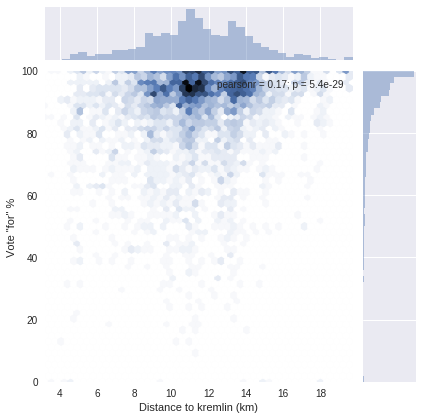

In [15]:
sns.jointplot(x='dist_kremlin', y='vote_for', kind='hex', data=df[df['dist_kremlin'] < 20])\
    .set_axis_labels('Distance to kremlin (km)', 'Vote "for" %')

Another driving factor can be distance to closest metro station, let's check it by. First calculate distance and print statistics.

In [16]:
metro = pd.read_csv('../data/moscow_metro.csv')

df['dist_metro'] = df.apply(axis=1, 
    func=lambda x: min(metro.apply(axis=1, 
        func=lambda y: haversine((y.lat, y.lon), (x.center_lat, x.center_lon)))))

df['dist_metro'].describe()

count    4546.000000
mean        1.515601
std         2.505989
min         0.025696
25%         0.643402
50%         1.026923
75%         1.550957
max        26.125039
Name: dist_metro, dtype: float64

Below is bivariate distribution of distance to metro against "for" votes (filtering houses that are too far away). Again there is small positive correlation of 0.14, but it is not that strong.

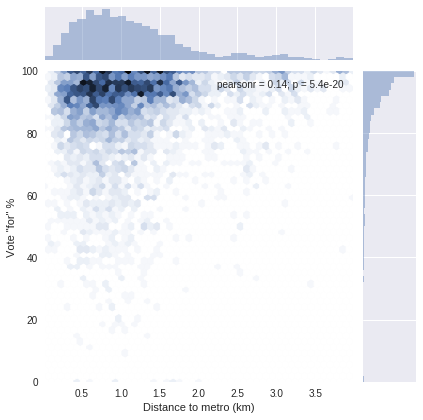

In [17]:
sns.jointplot(x='dist_metro', y='vote_for', kind='hex', data=df[df['dist_metro'] < 4])\
    .set_axis_labels('Distance to metro (km)', 'Vote "for" %')

At last let's check how percentage of people that voted relates to voting results. Positive correlation of 0.16 suggests that houses with more attendance tend to vote "for" more.

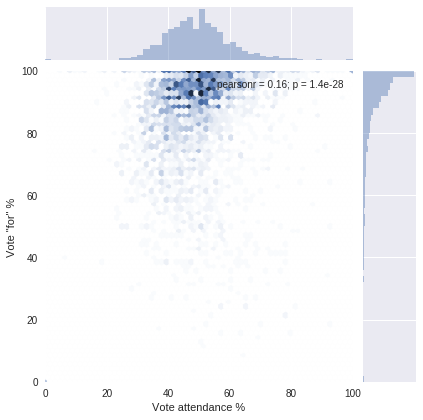

In [18]:
sns.jointplot(x='vote_attendance', y='vote_for', kind='hex', data=df)\
    .set_axis_labels('Vote attendance %', 'Vote "for" %')